# Training linear model with Normal Equation

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

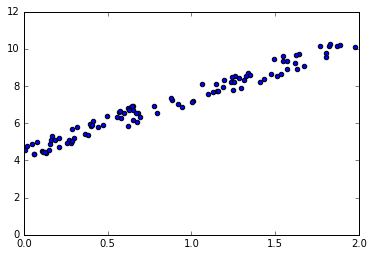

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.axis([0, 2, 0, 12])
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[ 4.4865401 ],
       [ 2.98341886]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.4865401 ],
       [ 10.45337781]])

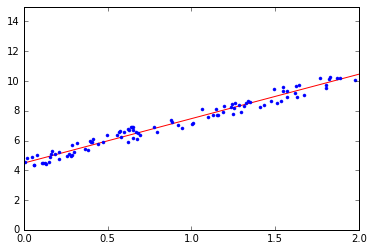

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## with Scikit learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([ 4.4865401]), array([[ 2.98341886]]))

In [8]:
lin_reg.predict(X_new)

array([[  4.4865401 ],
       [ 10.45337781]])

# Gradient Descent

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.4865401 ],
       [ 2.98341886]])

## Stochastic Gradient

In [10]:
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[ 4.49314423],
       [ 2.98091418]])

## Mini Batch Gradient

In [11]:
np.random.seed(42)
n_epochs = 50
batch_size = 10
m = int(len(X_b) / batch_size)
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
        yi = y_shuffled[i*batch_size:(i+1)*batch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[ 4.43573926],
       [ 3.08289032]])

# Polynomial regression

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [13]:
X_b = np.c_[np.ones((m,1)), X, X*X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[ 1.90823864],
       [ 1.06753938],
       [ 0.54944716]])

In [15]:
## same approach with scikit
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X[0], X_poly [0]

(array([ 2.90915042]), array([ 1.        ,  2.90915042,  8.46315615]))

# Learning curves

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 80, 0, 5])

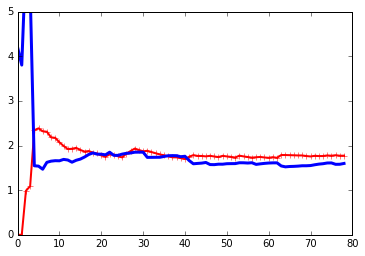

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

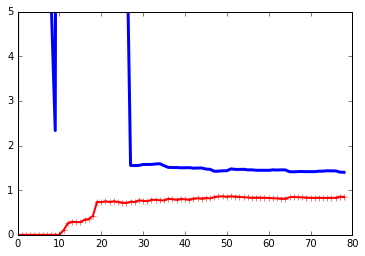

In [18]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

# Logistic regression

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target', 'DESCR', 'data', 'feature_names', 'target_names']

In [20]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [21]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

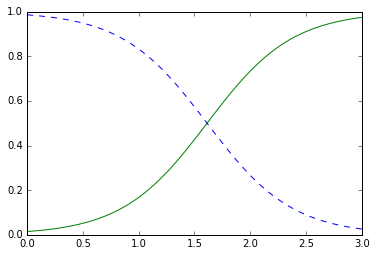

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [24]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [25]:
X = iris["data"][:, 2:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) #multinomial make it softmax
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
softmax_reg.predict([[5, 2]])

array([2])

In [29]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])

# Exercise

# batch gradient decent softmax with early stop

In [30]:
import numpy as np
np.random.seed(2042)


In [31]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

nb_sample = len(y)

X_with_bias = np.c_[np.ones(len(X)),X]
Y_one_hot = np.zeros((nb_sample,len(np.unique(y))))
Y_one_hot[np.arange(nb_sample), y] = 1

test_ratio = 0.2

indexes = np.random.permutation(nb_sample)
test_size = int(nb_sample * test_ratio)
validation_size = int(nb_sample * test_ratio)
train_size = nb_sample - test_size - validation_size
print(train_size)
x_train = X_with_bias[indexes[:train_size]]
y_train = Y_one_hot[indexes[:train_size]]
x_valid = X_with_bias[indexes[train_size:-test_size]]
y_valid = Y_one_hot[indexes[train_size:-test_size]]
x_test = X_with_bias[indexes[test_size:]]
y_test = Y_one_hot[indexes[test_size:]]


90


In [32]:
eta = 0.1
nb_epoch = 5001
epsilon = 1e-7

n_inputs = x_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = y_train.shape[1]   # == 3 (3 iris classes)

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

theta = np.random.randn(n_inputs,n_outputs) # random initialization

for epoch in range(nb_epoch):
    logits = x_train.dot(theta)
    proba = softmax(logits)
    loss = -1 * np.sum(y_train*np.log(proba+epsilon))/ y_train.shape[0]
    gradients =  1 / y_train.shape[0] * x_train.T.dot(proba - y_train)
    theta = theta - eta* gradients
    if epoch % 500 == 0:
        print(epoch, loss)

0 5.44618386482
500 0.39552283968
1000 0.307517676654
1500 0.262562805467
2000 0.233359236797
2500 0.2123687302
3000 0.196386890522
3500 0.183740522128
4000 0.173446612117
4500 0.164881822989
5000 0.157628912801


In [33]:
theta

array([[ 8.42273631,  1.08810844, -9.83980755],
       [-1.99005542,  0.2407315 ,  0.79961458],
       [-2.60967901, -0.84586848,  4.13666516]])

Making a prediction

In [34]:
logits = x_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == np.argmax(y_valid, axis=1))
accuracy_score

0.96666666666666667

Same with some L2 regularisation 

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [35]:
eta = 0.1
nb_epoch = 5001
epsilon = 1e-7
alpha = 0.1

theta = np.random.randn(n_inputs,n_outputs) # random initialization

for epoch in range(nb_epoch):
    logits = x_train.dot(theta)
    proba = softmax(logits)
    xentropy_loss = -1 * np.sum(y_train*np.log(proba+epsilon))/ y_train.shape[0]
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    gradients =  1 / y_train.shape[0] * x_train.T.dot(proba - y_train) + np.r_[np.zeros([1, n_inputs]), alpha * theta[1:]]
    theta = theta - eta* gradients
    if epoch % 500 == 0:
        print(epoch, loss)

0 6.62957494791
500 0.534163155437
1000 0.503771274864
1500 0.494805645558
2000 0.491408194841
2500 0.490008507445
3000 0.489407428961
3500 0.489143102469
4000 0.489025165491
4500 0.488972058096
5000 0.488948000479


In [36]:
theta

array([[ 4.98079972,  1.0475439 , -4.23641697],
       [-1.09725192,  0.12496446,  0.97228746],
       [-0.43904751, -0.13485798,  0.57390549]])

In [37]:
logits = x_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == np.argmax(y_valid, axis=1))
accuracy_score

1.0

In [38]:
eta = 0.1
nb_epoch = 5001
epsilon = 1e-7
alpha = 0.1

theta = np.random.randn(n_inputs,n_outputs) # random initialization
best_loss = np.infty

for epoch in range(nb_epoch):
    logits = x_train.dot(theta)
    proba = softmax(logits)
    # xentropy_loss = -np.sum(y_train*np.log(proba+epsilon))/ y_train.shape[0]
    xentropy_loss = -np.mean(np.sum(y_train * np.log(proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss

    gradients =  1 / y_train.shape[0] * x_train.T.dot(proba - y_train) + np.r_[np.zeros([1, n_inputs]), alpha * theta[1:]]
    theta = theta - eta * gradients
    
    logits = x_valid.dot(theta)
    proba = softmax(logits)
    # xentropy_loss = -np.sum(y_train*np.log(proba+epsilon))/ y_train.shape[0]
    xentropy_loss = -np.mean(np.sum(y_valid * np.log(proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss

    if epoch % 500 == 0:
        print(epoch, loss)
    if  loss < best_loss:
        best_loss = loss
    else:
        print("early break at iteration", epoch)
        break
    
        

0 1.08793519397
500 0.564886023645
1000 0.541371125867
1500 0.534991248115
2000 0.533079413966
2500 0.532626413063
early break at iteration 2683


In [39]:
theta

array([[ 4.71995606,  0.81757867, -4.03753473],
       [-1.06588384,  0.14811902,  0.91776482],
       [-0.43153164, -0.13012952,  0.56166116]])